In [3]:
import numpy as np
import tensorflow as tf

C:\Users\Aditya Gannavarapu\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
tf.__version__

'1.13.1'

In [5]:
mnist = tf.keras.datasets.mnist

(x_train , y_train),(x_test,y_test) = mnist.load_data()



In [6]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test , axis=1)

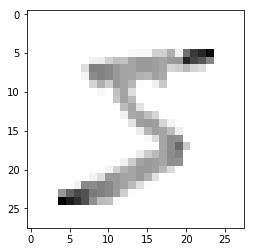

In [8]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap = plt.cm.binary)
plt.show()

In [9]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation= tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation= tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation= tf.nn.softmax))

In [10]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
60000/60000 [==============================] - 14s 231us/sample - loss: 0.2620 - acc: 0.9229
Epoch 2/3
60000/60000 [==============================] - 11s 189us/sample - loss: 0.1092 - acc: 0.9662
Epoch 3/3
60000/60000 [==============================] - 12s 199us/sample - loss: 0.0732 - acc: 0.9765


In [12]:
val_loss,val_acc = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 113us/sample - loss: 0.0912 - acc: 0.9731


In [13]:
print(val_loss,val_acc)

0.09119520958662033 0.9731


In [14]:
model.save('mnist_nn')

In [15]:
new_model = tf.keras.models.load_model('mnist_nn')

In [16]:
predictions = new_model.predict(x_test)
print(predictions)

[[1.30300855e-08 2.99100611e-09 1.85665783e-06 ... 9.99993324e-01
  5.44928458e-09 9.09079887e-08]
 [1.36709303e-07 2.90040020e-03 9.97091174e-01 ... 2.18740823e-07
  3.40088739e-08 2.20000129e-10]
 [8.73896965e-07 9.99386668e-01 1.23265432e-04 ... 2.13013438e-04
  2.16766726e-04 6.16308398e-06]
 ...
 [7.98786703e-10 2.69782130e-09 2.92576652e-09 ... 4.15551631e-06
  6.55294116e-07 9.19858940e-05]
 [8.12155122e-07 5.03498200e-07 1.90390338e-07 ... 5.02317789e-07
  1.54292979e-03 1.25603283e-09]
 [6.77442767e-06 3.12581321e-08 1.20194966e-06 ... 3.19477694e-10
  2.10793175e-07 4.02624531e-11]]


In [19]:
print(np.argmax(predictions[4]))

4


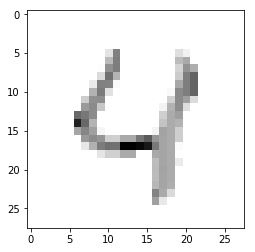

In [20]:
plt.imshow(x_test[4],cmap=plt.cm.binary)
plt.show()